## Emotion analysis and classification of short comments using machine learning techniques
+ Code developed by: Douglas Maia dos Santos
+ Github acess: https://github.com/
+ Colab acess: https://github.com/

##### Importing libraries for proper code functioning
The purpose of this code is to test the impacto of the oversampling function on the models that were implemented in "main.ipynb"

In [1]:

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from unicodedata import normalize
from imblearn.over_sampling import SMOTE
import pandas as pd
import nltk
import numpy as np
import string
import emotion_analysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
nltk.download('rslp')
nltk.download('stopwords')
plt.style.use('seaborn')

[nltk_data] Downloading package rslp to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = emotion_analysis.open_dataset('dataset.xlsx', 'xlsx')
df.Emoção = df.Emoção.str.lower()

In [3]:
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_characters)
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_accents)
df.Comentarios = df.Comentarios.apply(emotion_analysis.tokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_stopwords)
df.Comentarios = df.Comentarios.apply(emotion_analysis.untokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.stemming)

In [4]:
X, y = df.Comentarios, df.Emoção
X = emotion_analysis.vectorizer(X, 'tfidf')
train_size = .8
X_train, X_test, y_train, y_test = emotion_analysis.dataset_split(X, y, train_size)

In [5]:
oversample = SMOTE(random_state=2)
X_train_ressampled, y_train_ressampled, = oversample.fit_resample(X_train, y_train)

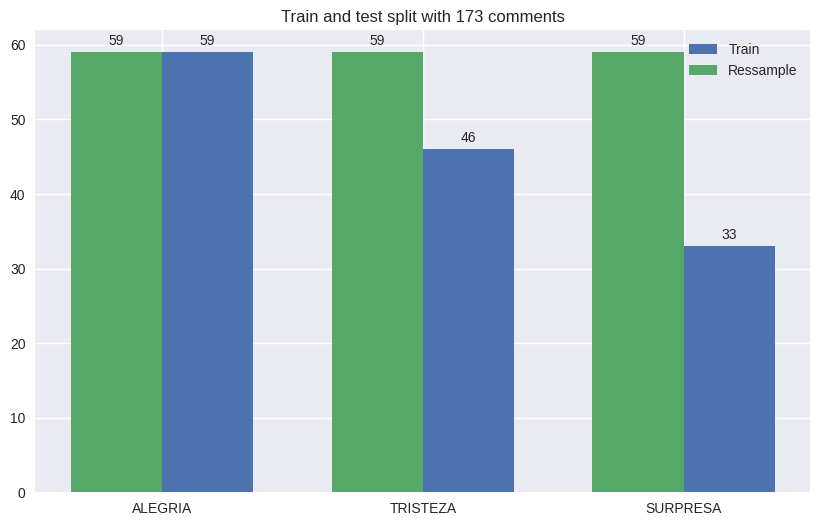

In [6]:
labels =  ['ALEGRIA', 'TRISTEZA', 'SURPRESA']

set_ = {'Train': y_train,
        'Train_ressampled': y_train_ressampled}
train, train_ressample = set_['Train'].value_counts(), set_['Train_ressampled'].value_counts()
width = .35
fig, axis = plt.subplots(figsize=(10, 6))
plt.title(f'Train and test split with {len(y_train)+len(y_test)} comments')
rec1 = axis.bar(np.arange(len(labels)) + width/2, train, width, label = 'Train')
rec2 = axis.bar(np.arange(len(labels)) - width/2, train_ressample, width,  label = 'Ressample')
axis.bar_label(rec1, padding=3)
axis.bar_label(rec2, padding=3)
plt.xticks(np.arange(len(labels)), labels)
plt.legend()
plt.show()

In [7]:
NB  = emotion_analysis.cv_train(classifier_name='NB',  X=X_train_ressampled, y= y_train_ressampled, n_fold=10)
SVM = emotion_analysis.cv_train(classifier_name='SVM', X=X_train_ressampled, y= y_train_ressampled, n_fold=10)
KNN = emotion_analysis.cv_train(classifier_name='KNN', X=X_train_ressampled, y= y_train_ressampled, n_fold=10)

pred_nb  = NB.predict(X_test)   # Naive Bayes prediction
pred_svm = SVM.predict(X_test)  # SVM prediction
pred_knn = KNN.predict(X_test)  # KNN prediction

Naive Bayes best parameters: {'alpha': 0.1, 'fit_prior': True}
Naive Bayes best accuracy in 10 folds: 77.09150326797388
Support Vector Machine best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Support Vector Machine best accuracy in 10 folds: 79.90196078431373
K-Nearest Neighbors best parameters: {'algorithm': 'auto', 'n_neighbors': 3}
K-Nearest Neighbors best accuracy in 10 folds: 66.83006535947712


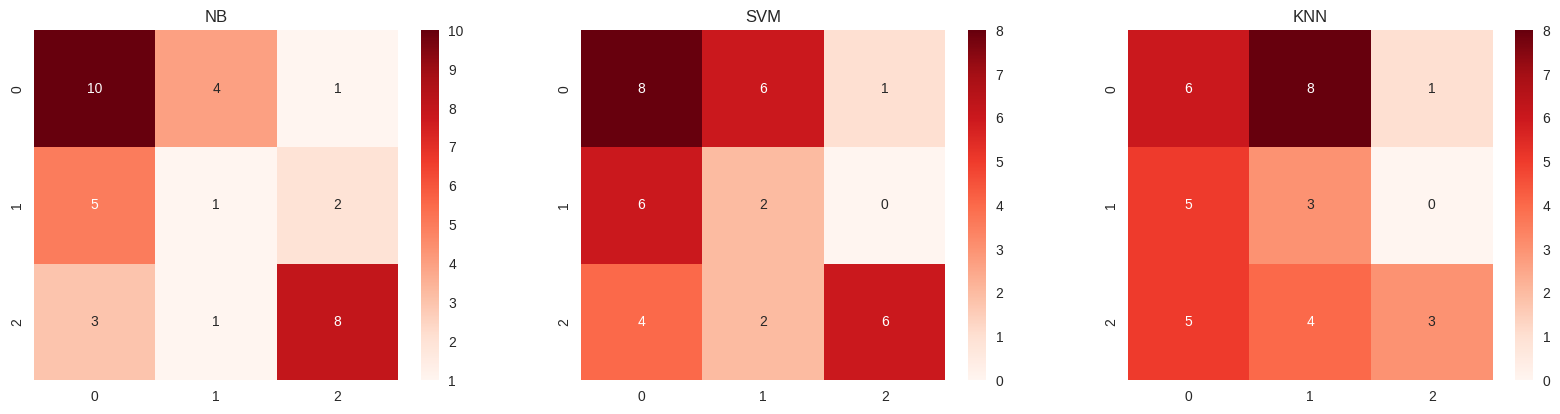

In [10]:
list_predict = [pred_nb, pred_svm, pred_knn]
models_names = ['NB', 'SVM', 'KNN']
'''OBS:
        0 = ALEGRIA
        1 = SURPRESA
        2 = TRISTEZA
'''
emotion_analysis.confusion_matrix_plot(list_predict = list_predict,
                                  models_names = models_names, 
                                  y_true       = y_test)

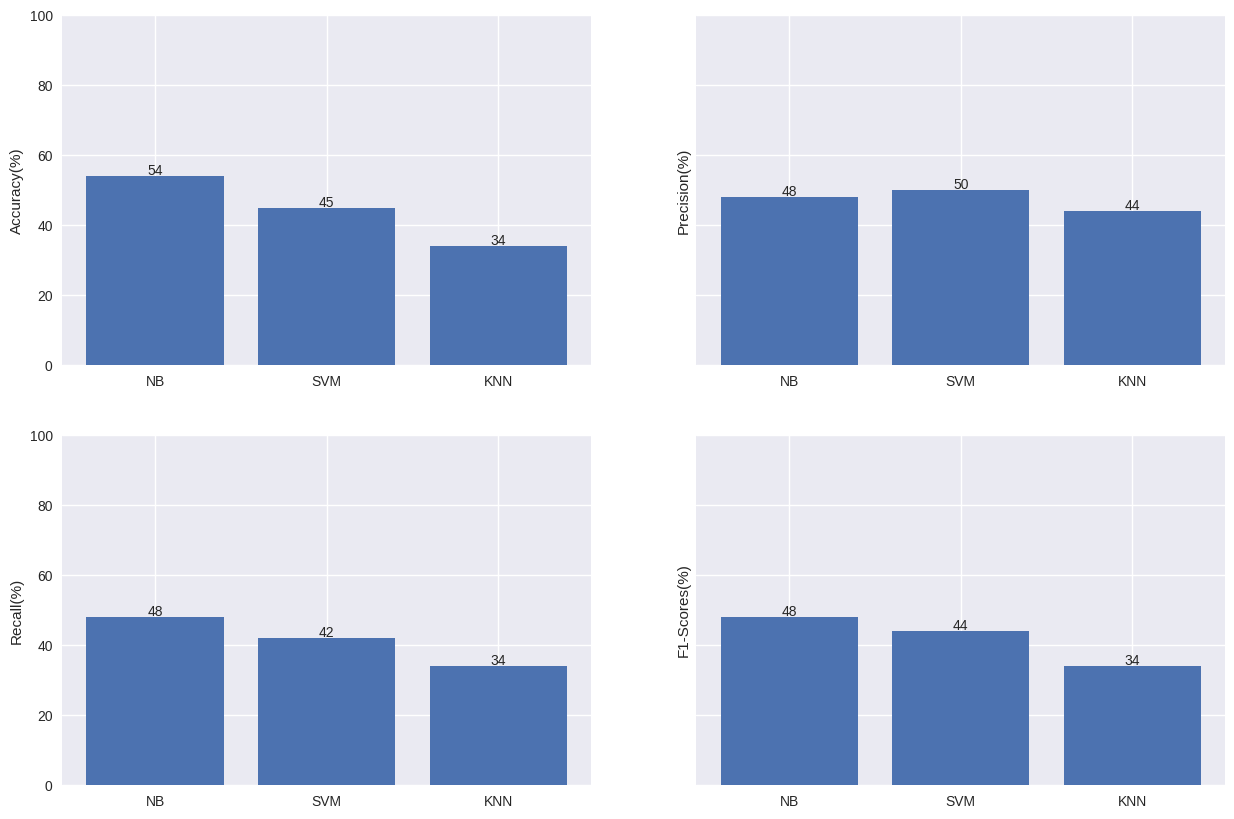

In [11]:
emotion_analysis.metrics_evaluation(models_names=models_names,
                   list_predict=list_predict,
                   y_true = y_test)